In [3]:
%pylab inline
import csv
import json
import numpy as np
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr,linregress
import math
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [7]:
users=[]
with open('user.json') as json_file:
    for line in json_file:
        users.append(json.loads(line))

In [8]:
business=[]
with open('business.json') as json_file:
    for line in json_file:
        business.append(json.loads(line))

In [4]:
tip=[]
with open('tip.json') as json_file:
    for line in json_file:
        tip.append(json.loads(line))

In [55]:
tip[2]

{u'business_id': u'dAa0hB2yrnHzVmsCkN4YvQ',
 u'date': u'2014-06-20',
 u'likes': 0,
 u'text': u'Nice place. Great staff.  A fixture in the township forever',
 u'type': u'tip',
 u'user_id': u'oaYhjqBbh18ZhU0bpyzSuw'}

In [9]:
users[0][u'elite']

[u'2017', u'2015', u'2016', u'2014', u'2011', u'2013', u'2012']

Break down elite users by putting together:

- yelping_since year, review_count, friends, useful/funny/cool votes, fans, compliments, avg stars (from user.json)
- review text, review stars, review date, review funny/useful/cool (from review.json)
- tips, date, likes (from tips.json)

To identify and separate the following:
1. Identify pre-elite years and reviews.
2. Identify post-elite years and reviews.

Possible combinations for elite / non-elite buckets:
- Non-elite
- Non-elite / Elite
- Non-elite / Elite / Non-elite
- Non-elite / Elite / Non-elite / Elite
- Etc.

# Questions to Answer

1. Can we assume that the requirements were the same for choosing elites over all possible years?


In [32]:
yearspossible=set()
for eachuser in range(len(users)):
    year_began = users[eachuser][u'yelping_since'][0:4]
    yearspossible.add(year_began)
yearspossible = sorted(list(yearspossible))

In [14]:
print yearspossible
year_began = '2017' #has index 13 #14-13 = 1
year_began = '2009' #has index 5 #14-5 = 9

[u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']


In [25]:
percentelite = []
elitecounter=0
usercounter=0
for eachuser in range(len(users)):
    elite = users[eachuser][u'elite']
    if elite[0] != u'None':
        year_began = users[eachuser][u'yelping_since'][0:4]
        poss_yelping = (len(yearspossible)) - yearspossible.index(year_began)
        elitelen = len(users[eachuser][u'elite'])
        percentelite.append(elitelen / float(poss_yelping))
        elitecounter+=1
    usercounter+=1
    #elitearray = users[eachuser][u'elite']
    #for year in elitearray:

In [26]:
print elitecounter
print usercounter

49704
1029432


(array([ 3934.,  7741.,  7685.,  6509.,  5969.,  4699.,  4036.,  3574.,
         2785.,  2772.]),
 array([ 0.07142857,  0.16428571,  0.25714286,  0.35      ,  0.44285714,
         0.53571429,  0.62857143,  0.72142857,  0.81428571,  0.90714286,  1.        ]),
 <a list of 10 Patch objects>)

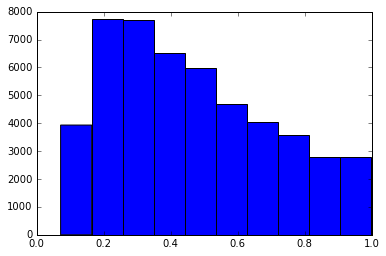

In [27]:
#What percent of the time are users "elite"?
hist(percentelite)

In [76]:
#What percent of tips are coming from elite users in years 2004-2017?

def getElites(users):
    '''Returns list of elite users for that year.'''
    elitelist = []
    selectyears = [u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', 
                   u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']
    for x in range(len(selectyears)):
        xyear=[]
        for eachuser in range(len(users)):
            elite = users[eachuser][u'elite']
            if elite[0] != u'None':
                if selectyears[x] in elite:
                    xyear.append(users[eachuser][u'user_id'])
        elitelist.append(xyear)
    return elitelist

In [77]:
elites = getElites(users)

In [48]:
len_elites=[]
for x in elites:
    len_elites.append(len(x))

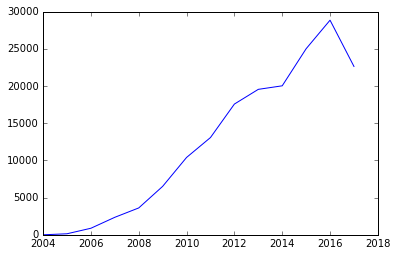

In [50]:
plt.plot(yearspossible, len_elites)

In [97]:
#946600 tips, what percent of them belong to elite users?

def groupTipsbyYear(tip):
    tipyears = []
    selectyears = [u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', 
                   u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']
    for x in range(len(selectyears)):
        xyear=[]
        for eachtip in tip:
            yeargiven = eachtip[u'date'][0:4]
            if selectyears[x] == yeargiven:
                xyear.append(eachtip)
        tipyears.append(xyear)
    return tipyears

def getTipElites(tipyears, elites):
    elitetipcounts=[]
    for x in range(len(elites)):
        tipcount=0
        for eachelite in elites[x]:
            if eachelite in tipyears[x]:
                tipcount+=1
        elitetipcounts.append(tipcount)
    return elitetipcounts

In [82]:
tipyears = groupTipsbyYear(tip)

In [86]:
len_tipyears=[]
for x in tipyears:
    len_tipyears.append(len(x))

In [ ]:
tipelites = getTipElites(tipyears, elites)

In [94]:
tipelites

NameError: name 'tipelites' is not defined